KOTARU SAI SUBHASH
sk12154@nyu.edu

[0.0001, 0.001, 0.01, 0.1, 1, 10, 30, 50]


<ipython-input-33-fc618dbd4160>:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)


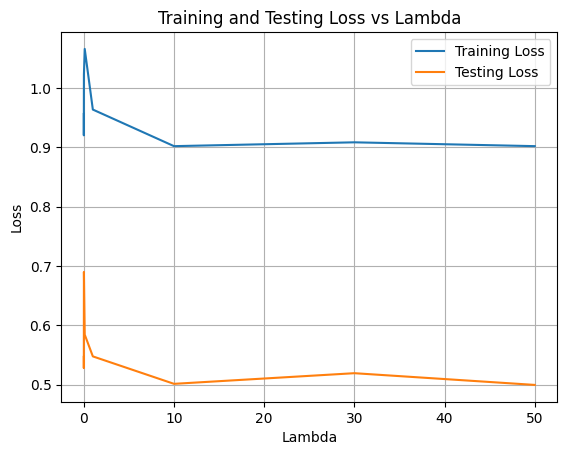

In [33]:
#SGD
import torch
import matplotlib.pyplot as plt
import numpy as np
torch.seed = 5
np.seed = 5
#Hyperparameters
learning_rate = 0.02
num_epochs = 120
lambda_reg_values = [1e-4, 0.001, 0.01, 0.1, 1, 10, 30, 50]
print(lambda_reg_values)
M = 9

def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)

X = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

def polynomial_transform(x, degree):
    x_poly = torch.ones((x.shape[0], 1))
    for d in range(1, degree + 1):
        x_poly = torch.cat((x_poly, x**d), dim=1)
    return x_poly


def compute_loss(X, y, weights, bias, lambda_reg):
    y_pred = X[:,1:] @ weights + bias
    # Loss with L2 regularization
    mse_loss = torch.mean((y_pred - y) ** 2)
    reg_loss = 0.5*lambda_reg * torch.norm(weights) ** 2
    return torch.sqrt(mse_loss + reg_loss)

X = polynomial_transform(X, M)

x_test = torch.linspace(0, 1, 100).unsqueeze(1)
y_test = torch.sin(2 * np.pi * x_test).unsqueeze(1)

train_losses_per_lambda = []
test_losses_per_lambda = []

for lambda_reg in lambda_reg_values:
    #Define the Model Parameters
    weights = torch.randn(M, requires_grad=True)  # Initialize weights
    bias = torch.randn(1, requires_grad=True)      # Initialize bias

    # Implementing the SGD Algorithm
    losses = []
    for epoch in range(num_epochs):
        # Forward pass: compute predicted y
        y_pred = X[:,1:] @ weights + bias

        # Compute the loss
        loss = compute_loss(X, y, weights, bias, lambda_reg)
        losses.append(loss.item())

        # Backward pass: compute gradients
        loss.backward()

        # print(f"Epoch: {epoch}, Loss: {loss.item()}")
        # Update weights and bias using SGD
        with torch.no_grad():
            w_grad = (X[:,1:].T @ (y_pred.unsqueeze(1) - y))/(X.shape[0]) + lambda_reg * weights.unsqueeze(1)
            weights -= learning_rate * w_grad.reshape(M) #weights.grad
            b_grad = torch.mean(y_pred - y)
            bias -= learning_rate * b_grad

        # Zero the gradients after updating
        weights.grad.zero_()
        bias.grad.zero_()

    train_loss = losses[-1]
    train_losses_per_lambda.append(train_loss)

    #Testing Loss
    X_test = polynomial_transform(x_test, M)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_pred_test = X_test[:,1:] @ weights + bias

    test_loss = torch.mean((y_pred_test - y_test) ** 2).item()
    test_losses_per_lambda.append(test_loss)


# print(train_losses_per_lambda)
# print(test_losses_per_lambda)

# Plot training and testing loss vs lambda
plt.plot(lambda_reg_values, train_losses_per_lambda, label='Training Loss')
plt.plot(lambda_reg_values, test_losses_per_lambda, label='Testing Loss')
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.title('Training and Testing Loss vs Lambda')
plt.legend()
plt.grid(True)
plt.show()



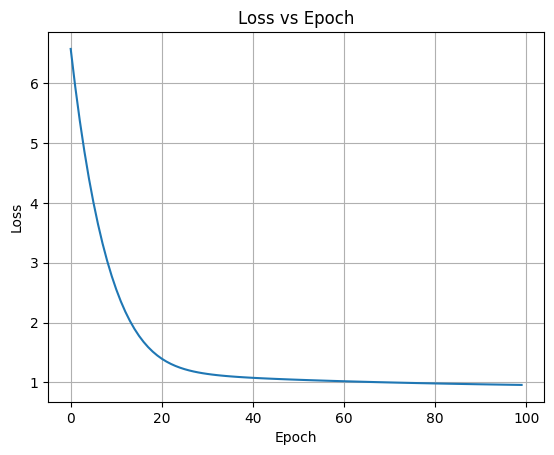

tensor([ 2.5731e-03, -3.1949e-03, -3.4207e-03, -2.4689e-03, -1.4912e-03,
        -5.8860e-04, -8.2868e-06,  5.2972e-04,  9.7338e-04],
       requires_grad=True)
Final bias: -0.3049277663230896


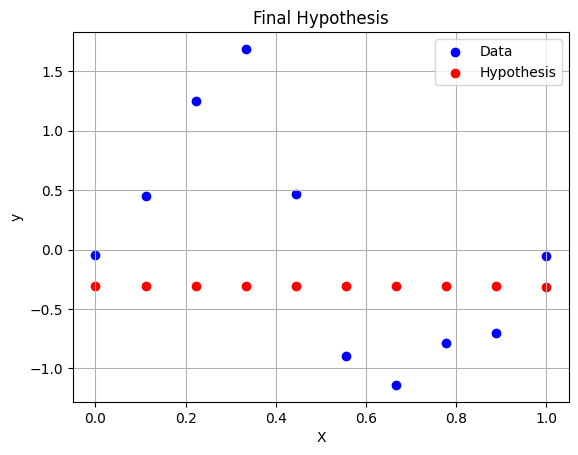

In [34]:

torch.manual_seed(5)
np.random.seed(5)

#Hyperparameters
learning_rate = 0.01
num_epochs = 100
lambda_reg = 10 #Choosing lambda = 10 from the above plot training and testing loss are low
M = 9

def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)



X = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

def polynomial_transform(x, degree):
    x_poly = torch.ones((x.shape[0], 1))
    for d in range(1, degree + 1):
        x_poly = torch.cat((x_poly, x**d), dim=1)
    return x_poly

X = polynomial_transform(X, M)

x_test = torch.linspace(0, 1, 100).unsqueeze(1)
y_test = torch.sin(2 * np.pi * x_test).unsqueeze(1)
#Define the Model Parameters
weights = torch.randn(M, requires_grad=True)  # Initialize weights
bias = torch.randn(1, requires_grad=True)      # Initialize bias

#Define Loss Function
def compute_loss(X, y, weights, bias, lambda_reg):
    y_pred = X[:,1:] @ weights + bias
    # Loss with L2 regularization
    mse_loss = torch.mean((y_pred - y) ** 2)
    reg_loss = 0.5*lambda_reg * torch.norm(weights) ** 2
    return torch.sqrt(mse_loss + reg_loss)

# Implementing the SGD Algorithm
losses = []
for epoch in range(num_epochs):
    # Forward pass: compute predicted y
    y_pred = X[:,1:] @ weights + bias

    # Compute the loss
    loss = compute_loss(X, y, weights, bias, lambda_reg)
    losses.append(loss.item())

    # Backward pass: compute gradients
    loss.backward()

    # Update weights and bias using SGD
    with torch.no_grad():

        w_grad = (X[:,1:].T @ (y_pred.unsqueeze(1) - y))/(X.shape[0]) + lambda_reg * weights.unsqueeze(1)
        weights -= learning_rate * w_grad.reshape(M)
        b_grad = torch.mean(y_pred - y)
        bias -= learning_rate * b_grad


    # Zero the gradients after updating
    weights.grad.zero_()
    bias.grad.zero_()

#Plot Loss vs Epoch
plt.plot(losses)
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Final weights and bias
print(weights)
print(f"Final bias: {bias.item()}")

# Plotting final hypothesis
plt.scatter(x_train, y_train, label='Data', color='blue')
plt.scatter(x_train, (X[:,1:] @ weights + bias).detach().numpy(), label='Hypothesis', color='red')
plt.title("Final Hypothesis")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


### 1. Model Prediction

The model prediction \( \hat{y} \) for a set of inputs \( X \) is given by:

$$
\hat{y} = Xw + b
$$

Where:
- \( X \) is the input data matrix (without bias term).
- \( w \) are the weights.
- \( b \) is the bias term.

---

### 2. Loss Function with Regularization

The loss function used is the Mean Squared Error (MSE) with L2 regularization (Ridge regression):

$$
L(w, b) = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2 + \lambda \| w \|^2
$$

Where:
- $$( \hat{y}_i)$$ is the predicted output for the \(i\)-th example.
- $$( y_i )$$ is the actual target value for the \(i\)-th example.
- \( N \) is the number of samples.

- $$(\lambda )$$ is the regularization parameter.

- $$( \| w \|^2 )$$ is the L2 norm of the weights.

---

### 3. Gradient of Weights (w)

The gradient of the loss function \(L(w, b)\) with respect to the weights \( w \) is:

$$
\nabla_w L = \frac{1}{N} X^\top (\hat{y} - y) + \lambda w
$$


---

### 4. Gradient of Bias (b)

The gradient of the loss function \(L(w, b)\) with respect to the bias \( b \) is:

$$
\nabla_b L = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)
$$

This is the average of the residuals (the difference between predictions and actual values).

---

### 5. Parameter Updates

The weights and bias are updated using gradient descent:

#### Weights update:

$$
w = w - \eta \nabla_w L
$$

#### Bias update:

$$
b = b - \eta \nabla_b L
$$

Where $$ \eta $$ is the learning rate.


In [35]:
weights

tensor([ 2.5731e-03, -3.1949e-03, -3.4207e-03, -2.4689e-03, -1.4912e-03,
        -5.8860e-04, -8.2868e-06,  5.2972e-04,  9.7338e-04],
       requires_grad=True)

<ipython-input-36-aa34be62c8a9>:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)


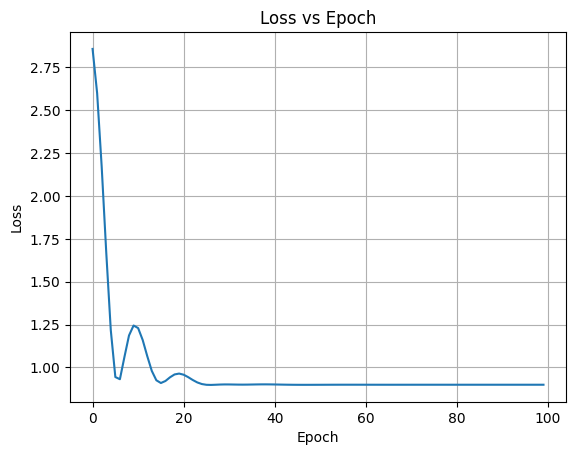

tensor([-0.0151, -0.0154, -0.0130, -0.0105], requires_grad=True)
Final bias: 0.04257078096270561


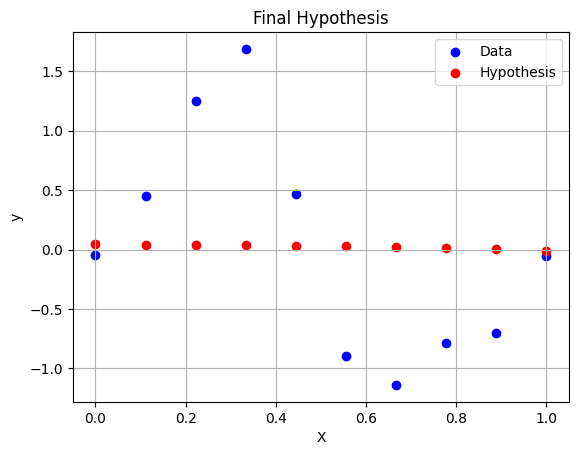

In [36]:
#SGD with momentum
import torch
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(5)
np.random.seed(5)

#Hyperparameters
learning_rate = 0.01
num_epochs = 100
lambda_reg = 10
M = 4
momentum = 0.8

def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_tr, y_train = create_toy_data(sinusoidal, 10, 0.25)

x_tr = torch.tensor(x_tr, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

def polynomial_transform(x, degree):
    x_poly = torch.ones((x.shape[0], 1))
    for d in range(1, degree + 1):
        x_poly = torch.cat((x_poly, x**d), dim=1)
    return x_poly

X = polynomial_transform(x_tr, M)
X = torch.tensor(X, dtype=torch.float32)

x_test = torch.linspace(0, 1, 100).unsqueeze(1)
y_test = torch.sin(2 * np.pi * x_test).unsqueeze(1)
#Define the Model Parameters
weights = torch.randn(M, requires_grad=True)  # Initialize weights
bias = torch.randn(1, requires_grad=True)      # Initialize bias

velocity_w = torch.zeros(M)
velocity_b = torch.zeros(1)

#Define Loss Function
def compute_loss(X, y, weights, bias, lambda_reg):
    y_pred = X[:,1:] @ weights + bias
    # Loss with L2 regularization
    mse_loss = torch.mean((y_pred - y) ** 2)
    reg_loss = 0.5*lambda_reg * torch.norm(weights) ** 2
    return torch.sqrt(mse_loss + reg_loss)

# Implementing the SGD Algorithm
losses = []
for epoch in range(num_epochs):
    # Forward pass: compute predicted y
    y_pred = X[:,1:] @ weights + bias

    # Compute the loss
    loss = compute_loss(X, y, weights, bias, lambda_reg)
    losses.append(loss.item())

    # Backward pass: compute gradients
    loss.backward()

    # Update weights and bias using SGD
    with torch.no_grad():

        w_grad = (X[:,1:].T @ (y_pred.unsqueeze(1) - y))/(X.shape[0]) + lambda_reg * weights.unsqueeze(1)
        b_grad = torch.mean(y_pred - y)

        velocity_w = momentum * velocity_w + learning_rate * w_grad.reshape(M)
        velocity_b = momentum * velocity_b + learning_rate * b_grad

        # Update weights and bias
        weights -= velocity_w
        bias -= velocity_b

    # Zero the gradients after updating
    weights.grad.zero_()
    bias.grad.zero_()

# Plot Loss vs Epoch
plt.plot(losses)
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Final weights and bias
print(weights)
print(f"Final bias: {bias.item()}")

# Plotting final hypothesis
plt.scatter(x_tr, y_train, label='Data', color='blue')
plt.scatter(x_tr, (X[:,1:] @ weights + bias).detach().numpy(), label='Hypothesis', color='red')
plt.title("Final Hypothesis")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


### Momentum-Based Gradient Descent

The following equations represent momentum-based updates for weights and bias in a gradient descent algorithm:

---

### 1. Weight Gradient

The gradient of the loss function with respect to the weights \( w \) is:

$$
\nabla_w L = \frac{1}{N} X^\top (\hat{y} - y) + \lambda w
$$

Where:
- \( N \) is the number of samples.
- \( X^\top \) is the transpose of the input matrix.
- \( (\hat{y} - y) \) is the difference between the predicted and actual values.
- \( \lambda w \) is the regularization term.

---

### 2. Bias Gradient

The gradient of the loss function with respect to the bias \( b \) is:

$$
\nabla_b L = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)
$$

This is the average of the residuals between predictions and actual values.

---

### 3. Momentum-Based Updates

The updates for weights and bias using momentum can be expressed as:

#### Velocity for weights:

$$
v_w = \mu v_w + \eta \nabla_w L
$$

#### Velocity for bias:

$$
v_b = \mu v_b + \eta \nabla_b L
$$

Where:
- \( v_w \) and \( v_b \) are the velocities for weights and bias, respectively.
- \( \mu \) is the momentum term.
- \( \eta \) is the learning rate.

---

### 4. Parameter Updates

The weights and bias are updated using the velocities:

#### Weights update:

$$
w = w - v_w
$$

#### Bias update:

$$
b = b - v_b
$$

---

Where:
- \( w \) is the weight vector.
- \( b \) is the bias term.
- \( v_w \) is the velocity for the weights.
- \( v_b \) is the velocity for the bias.


PART B

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/assignment1b/train'

chunksize = 1000000
chunk_iter = pd.read_csv(file_path, chunksize=chunksize)

sampled_chunks = []
for chunk in chunk_iter:
     sampled_chunks.append(chunk.sample(n = int(0.1*len(chunk))))
df = pd.concat(sampled_chunks)

Mounted at /content/drive


In [3]:
df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,4.042896e+06,4.042896e+06,4.042896e+06,4.042896e+06,4.042896e+06,4.042896e+06,4.042896e+06,4.042896e+06,4.042896e+06,4.042896e+06,4.042896e+06,4.042896e+06,4.042896e+06,4.042896e+06,4.042896e+06
mean,9.223056e+18,1.697575e-01,1.410256e+07,1.004968e+03,2.880183e-01,1.015262e+00,3.313103e-01,1.884584e+04,3.188791e+02,6.008581e+01,2.112988e+03,1.431726e+00,2.268990e+02,5.321585e+04,8.340953e+01
std,5.325513e+18,3.754197e-01,2.966795e+02,1.095460e+00,5.066070e-01,5.279133e-01,8.548613e-01,4.954626e+03,2.134574e+01,4.725720e+01,6.089396e+02,1.326335e+00,3.508441e+02,4.995684e+04,7.030332e+01
min,2.052565e+12,0.000000e+00,1.410210e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,4.611653e+18,0.000000e+00,1.410230e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,9.224444e+18,0.000000e+00,1.410260e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01
75%,1.383624e+19,0.000000e+00,1.410281e+07,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000880e+05,1.010000e+02
max,1.844674e+19,1.000000e+00,1.410302e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.839000e+03,1.002480e+05,2.550000e+02


In [4]:
#Removing outliers
cols = ['C14', 'C17', 'C19', 'C20']
for col in cols:
    percentiles = df[col].quantile(0.95)
    if df[col].quantile(0.95) < 0.5 * df[col].max():
        df[col][df[col] >= percentiles] = percentiles

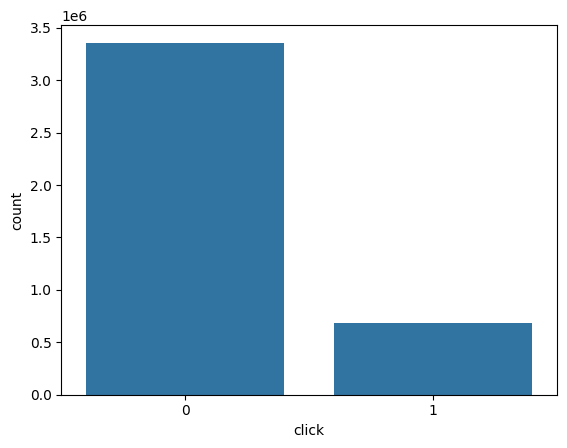

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(x='click', data=df)
plt.show()

In [6]:
print(df.isnull().sum())

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64


In [7]:
#Dropping id as it has no significance
X = df.drop(columns = ['id', 'hour', 'click'])
y = df['click']

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4042896 entries, 437483 to 40245939
Data columns (total 21 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   C1                int64 
 1   banner_pos        int64 
 2   site_id           object
 3   site_domain       object
 4   site_category     object
 5   app_id            object
 6   app_domain        object
 7   app_category      object
 8   device_id         object
 9   device_ip         object
 10  device_model      object
 11  device_type       int64 
 12  device_conn_type  int64 
 13  C14               int64 
 14  C15               int64 
 15  C16               int64 
 16  C17               int64 
 17  C18               int64 
 18  C19               int64 
 19  C20               int64 
 20  C21               int64 
dtypes: int64(12), object(9)
memory usage: 678.6+ MB


In [9]:
#Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
# Categorical columns that need to be encoded
categorical_cols = ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_model', 'device_id', 'device_ip']


#Using label encoder
for col in categorical_cols:
    X[col] = label_enc.fit_transform(X[col])

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model',
       'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21'],
      dtype='object')


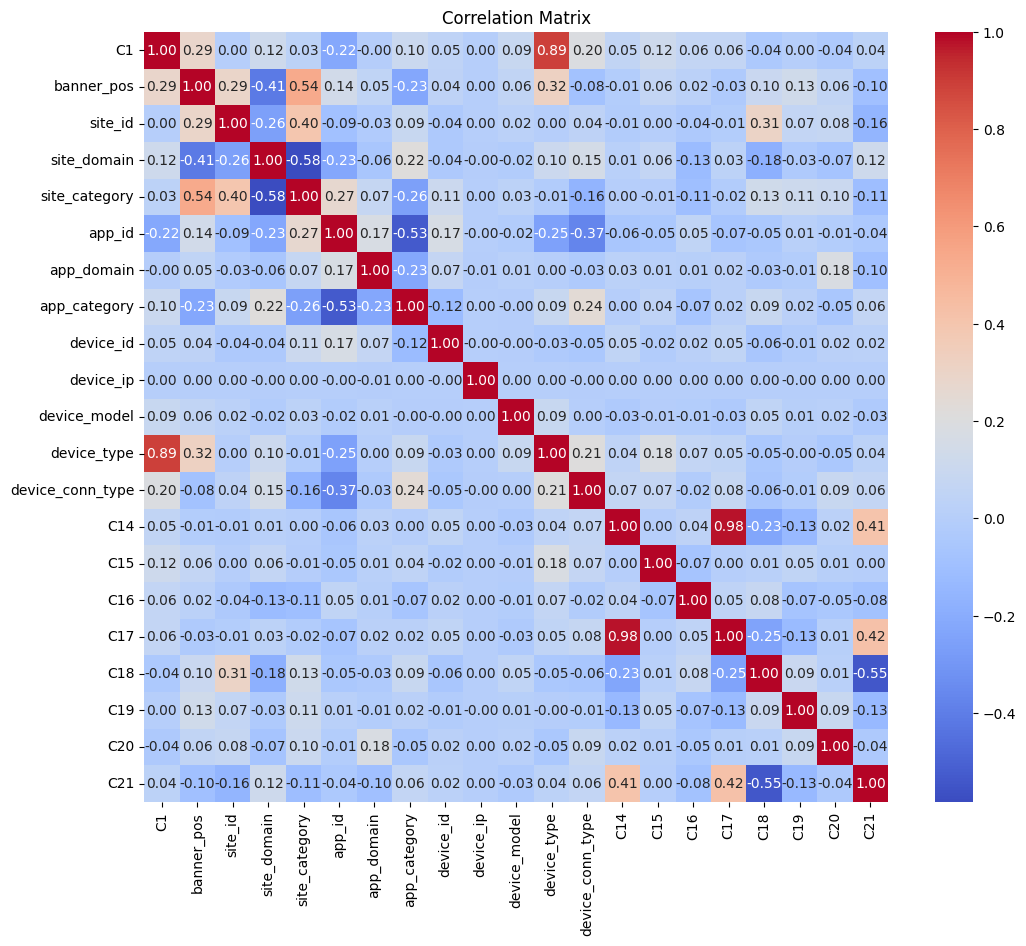

In [10]:

#Correlation
X = pd.DataFrame(X)
print(X.columns)
correlation_matrix = pd.DataFrame(X).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [11]:

#Dropping C1, C14 as they have high correlation with other columns
X = df.drop(columns = ['C14', 'C1', 'id', 'hour', 'click'])

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4042896 entries, 437483 to 40245939
Data columns (total 19 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   banner_pos        int64 
 1   site_id           object
 2   site_domain       object
 3   site_category     object
 4   app_id            object
 5   app_domain        object
 6   app_category      object
 7   device_id         object
 8   device_ip         object
 9   device_model      object
 10  device_type       int64 
 11  device_conn_type  int64 
 12  C15               int64 
 13  C16               int64 
 14  C17               int64 
 15  C18               int64 
 16  C19               int64 
 17  C20               int64 
 18  C21               int64 
dtypes: int64(10), object(9)
memory usage: 616.9+ MB


In [13]:

# Categorical columns that need to be encoded
categorical_cols = ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_model', 'device_id', 'device_ip']


#Using label encoder
for col in categorical_cols:
    X[col] = label_enc.fit_transform(X[col])

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [15]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler


In [16]:
#Sampling data as it is highly imbalanced
from imblearn.over_sampling import RandomOverSampler
randomsample=  RandomOverSampler()
X, y = randomsample.fit_resample(X, y)

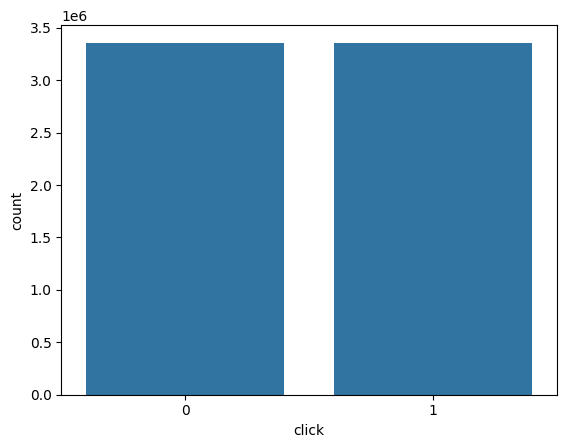

In [17]:
plt.figure()
sns.countplot(x=y, data=df)
plt.show()

In [19]:
import torch
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=28)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [20]:
y_train.shape

torch.Size([6041851])

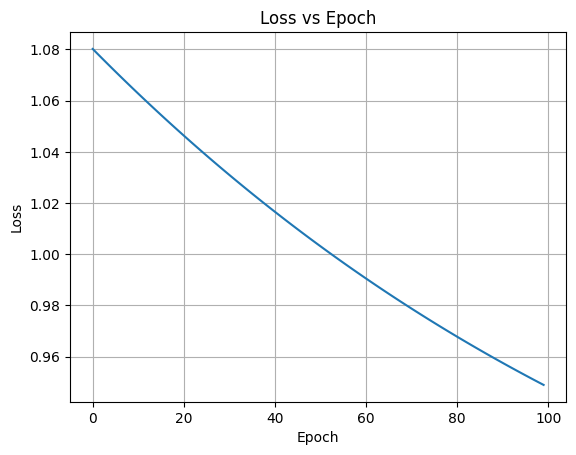

In [27]:
import torch
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(5)
np.random.seed(5)
#Hyperparameters
learning_rate = 0.005
num_epochs = 100
lambda_reg = 1

def sig(x):
    return 1 / (1 + torch.exp(-x))

#Define the Model Parameters
weights = torch.randn(X_train.shape[1], 1, requires_grad=True)  # Initialize weights
bias = torch.randn(1, requires_grad=True)      # Initialize bias


#Define Loss Function
def compute_loss(h, y, weights, lambda_reg):

    h = torch.clamp(h, 1e-7, 1 - 1e-7)
    bce_loss = torch.mean(-y_train.unsqueeze(1) * torch.log(h) - (1 - y_train.unsqueeze(1)) * torch.log(1 - h))

    reg_loss = 0.5 * lambda_reg * torch.norm(weights) ** 2
    return bce_loss #+ reg_loss

# SGD Algorithm
losses = []
for epoch in range(num_epochs):
    # Forward pass: compute predicted y
    z = X_train @ weights  + bias
    h = sig(z)


    # Compute the loss
    loss = compute_loss(h, y_train, weights, lambda_reg)
    losses.append(loss.item())

    # Backward pass: compute gradients
    loss.backward()

    # Update weights and bias using SGD
    with torch.no_grad():
        w_grad = (X_train.T @ (h - y_train.unsqueeze(1)))/(X_train.shape[0])#+ lambda_reg * weights
        # print(w_grad)
        weights -= learning_rate * w_grad #weights.grad
        b_grad = torch.mean( h - y_train.unsqueeze(1))
        bias -= learning_rate * b_grad
        # print(weights.unsqueezed(1).shape)
        # print(bias.grad)


#Plot Loss vs Epoch
plt.plot(losses)
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()


### Logistic Regression Gradient Equations

The objective is to minimize the **Binary Cross-Entropy Loss** function, also known as the **Log-Loss**, which is defined as:

$$
L(w, b) = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] + \frac{\lambda}{2} \|w\|^2
$$


Where:
- $$( \hat{y}_i = \sigma(w^T x_i + b) ) is the predicted probability for instance (i),
$$

### Gradient with respect to weights \( w \):

The gradient of the loss function with respect to the weights \( w \) is:

$$
\nabla_w L = \frac{1}{N} \sum_{i=1}^{N} ( \hat{y}_i - y_i ) x_i + \lambda w
$$



### Gradient with respect to bias \( b \):

The gradient of the loss function with respect to the bias \( b \) is:

$$
\nabla_b L = \frac{1}{N} \sum_{i=1}^{N} ( \hat{y}_i - y_i )
$$

### Updating the weights and bias using gradient descent:

The weights and bias are updated using **Stochastic Gradient Descent (SGD)** with learning rate \( \eta \):

$$
w \leftarrow w - \eta \nabla_w L
$$
$$
b \leftarrow b - \eta \nabla_b L
$$

### Regularization:

To prevent overfitting, we add **L2 regularization** (Ridge Regularization) to the loss function:

$$
\text{Regularized Loss} = L(w, b) + \frac{\lambda}{2} \| w \|^2
$$


In [28]:
weights

tensor([[ 1.8366],
        [ 0.4564],
        [-1.7775],
        [-1.0187],
        [-0.2142],
        [-0.6486],
        [ 0.1267],
        [-0.2182],
        [ 2.5436],
        [-0.4873],
        [ 0.3296],
        [-2.0365],
        [ 1.4585],
        [ 0.4900],
        [ 0.1688],
        [ 1.6600],
        [ 0.7286],
        [-0.0330],
        [-1.1940]], requires_grad=True)

In [29]:
def predict(X, weights, bias):
    z = X @ weights + bias
    h = sig(z)
    return int(h>=0.5)

In [30]:
y_pred = []
for i in range(len(X_test)):
    y_pred.append(predict(X_test[i], weights, bias))

In [31]:
def calculate_precision_recall(y_true, y_pred):

  tp = 0
  fp = 0
  fn = 0

  for i in range(len(y_true)):
    if y_true[i] == 1 and y_pred[i] == 1:
      tp += 1
    elif y_true[i] == 0 and y_pred[i] == 1:
      fp += 1
    elif y_true[i] == 1 and y_pred[i] == 0:
      fn += 1

  if tp + fp == 0:
    precision = 0
  else:
    precision = tp / (tp + fp)

  if tp + fn == 0:
    recall = 0
  else:
    recall = tp / (tp + fn)

  return precision, recall

y_test_list = y_test.tolist()
y_pred_list = y_pred

precision, recall = calculate_precision_recall(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.5173808947140639
Recall: 0.7762200479530597


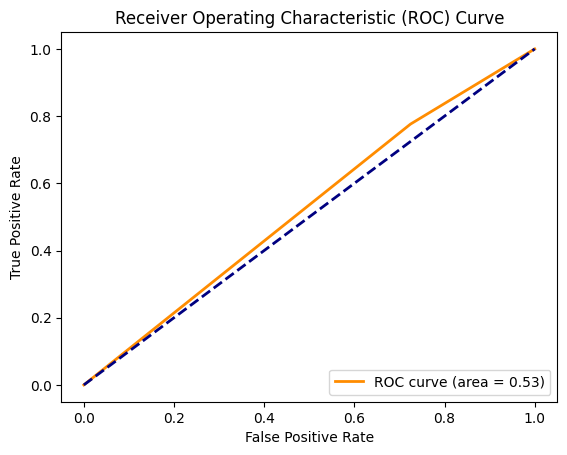

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test.tolist(), y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Model has low precision and high recall because of large number of false positives